In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Numpy

In [2]:
A = np.arange(2*3*4*5*6).reshape(2, 3, 4, 5, 6)
print(A.shape)
B = A.reshape(-1) # Po prostu spłaszczamy wszystko
print(B.shape)

B = A.reshape(2, -1) # Spłaszczamy wszystko oprócz pierwszego wymiaru. 
                     # Ale uwaga, my nie mówimy mu bezpośrednio że chcemy zostawić akurat pierwszy wymiar. 
                     # My tylko mówimy że chcemy żeby pierwszy wymiar był 2, a ponieważ wcześniej też był 2 to go zostawia.
print(B.shape)

B = A.reshape(4, -1) # W tym przypadku pierwszy wymiar jest inny niż ten co wcześniej, 
                     # można to sobie tłumaczyć tak że on za każdym razem najpierw całkowicie spłaszcza a pózniej od nowa tworzy dane wymiary. 
                     # Nie mogę wymyślić sensownego zastosowania takiego przekształcenia ale no warto wiedzieć że tak się da :) 
print(B.shape)

B = A.reshape(2, 3, 4, -1) # Czasami chcemy spłaszczyć kilka ostatnich wymiarów, można to zrobić właśnie w ten sposób.
print(B.shape)

(2, 3, 4, 5, 6)
(720,)
(2, 360)
(4, 180)
(2, 3, 4, 30)


In [3]:
# Gdy mamy sobie zwykły wektor jednowymiarowy i chcemy mu dodać jeden wymiar, to też właśnie można użyć -1:

A = np.array([2, 4, 7])
print(A.shape)
B = A.reshape(1, -1) # Tutaj -1 po prostu spłaszcza to co już jest spłaszczone
print(B.shape)

B = A.reshape(-1, A.shape[0]) # A tutaj -1 odpowiada dodatkowemu wymiarowi
print(B.shape)

# Można osiągnąć ten sam efekt inną metodą która służy do dodawania wymiaru:
B = A[None]
print(B.shape)
# Oczywiście tych None możemy dawać ile potrzebujemy:
B = A[None, None, :, None, None]
print(B.shape, B)

(3,)
(1, 3)
(1, 3)
(1, 3)
(1, 1, 3, 1, 1) [[[[[2]]

   [[4]]

   [[7]]]]]


In [4]:
# Warto też wiedzieć kiedy tworzymy kopię macierzy a kiedy tylko odwołanie do niej:

def fun(X):
  X += 1
A = np.arange(5)
print(A)
fun(A) 
print(A)
fun(A.copy())
print(A)

[0 1 2 3 4]
[1 2 3 4 5]
[1 2 3 4 5]


In [5]:
print(A)
B = A
B += 1
print(A)
C = A.copy()
C += 1
print(A)

[1 2 3 4 5]
[2 3 4 5 6]
[2 3 4 5 6]


In [6]:
# Tutaj jeszcze krótko o możliwościach indeksowania:
A = np.arange(10)
print(A)
print(A[-1], A[-2]) # Z minusem indeksujemy od tyłu

print(A[::2]) # Bierzemy co drugi element licząc od 0

print(A[1::2]) # Bierzemy co drugi element licząc od 1

print(A[::-2]) # Bierzemy co drugi element licząc od 9 od tyłu

print(A[::-1]) # Odwracamy kolejność

[0 1 2 3 4 5 6 7 8 9]
9 8
[0 2 4 6 8]
[1 3 5 7 9]
[9 7 5 3 1]
[9 8 7 6 5 4 3 2 1 0]


In [7]:
# Tutaj bardzo polecam zaznajomić się z dokumentacją np.dot: https://numpy.org/doc/stable/reference/generated/numpy.dot.html 
# Różnice między dot a *:
A = np.arange(1, 5).reshape(2, 2)
B = np.arange(1, 3)
print(A * B)
print(A * B[None])
print(A * B[:, None])
print(np.dot(A, B))
# print(np.dot(A, B[None])) to nie przejdzie 
print(np.dot(A, B[:, None]))

# Dlatego warto uważać z wymiarami i dokładnie się zastanowić co chcemy uzyskać i w jaki sposób!

[[1 4]
 [3 8]]
[[1 4]
 [3 8]]
[[1 2]
 [6 8]]
[ 5 11]
[[ 5]
 [11]]


In [8]:
# To też może być nieintuicyjne:
A = np.arange(10)
B = A[:, None]
print(A.shape, B.shape, (A+B).shape)

(10,) (10, 1) (10, 10)


In [9]:
# Krótko o działaniach na poszczególnych wymiarach:
A = np.arange(2 * 3 * 4).reshape(2, 3, 4)
# Jeżeli chcemy uzyskać sumę po jednym z wymiarów to można to zrobić tak:
B = np.sum(A, axis=2) # Tu możemy wstawić dowolne działanie, typu std czy meidan
# Lub tak:
C = np.sum(A, axis=-1)
# To to samo ponieważ 2 jest ostatnim wymiarem, a -1 oznacza właśnie ostatni wymiar.
print(B.shape, C.shape, (B == C).all())

# Jeżeli chcemy zachować wymiar po którym coś zdziałaliśmy to jest do tego opcja:
D = np.sum(A, axis=-1, keepdims=True)
print(D.shape)

(2, 3) (2, 3) True
(2, 3, 1)


# Funkcje

In [10]:
# Te funkcje robią to samo, ale wersja z lambdą jest krótsza
def fun1(a):
  return a + 1

fun2 = lambda a: a + 1

print(fun1(2), fun2(2))

3 3


#Pętle

In [11]:
# Jak szybko stworzyć jakąś listę?

# Można tak:

def fun(x):
  return x ** 2

l1 = []

for i in range(10):
  l1.append(fun(i))
print(l1)

# Albo szybciej:

l2 = [i ** 2 for i in range(10)]
print(l2)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


#Wykresy

Jeżeli chcecie się nauczyć robić takie super wykresy to baardzo polecam ten przedmiot: https://usosweb.uw.edu.pl/kontroler.php?_action=katalog2/przedmioty/pokazPrzedmiot&prz_kod=1000-719DAV 

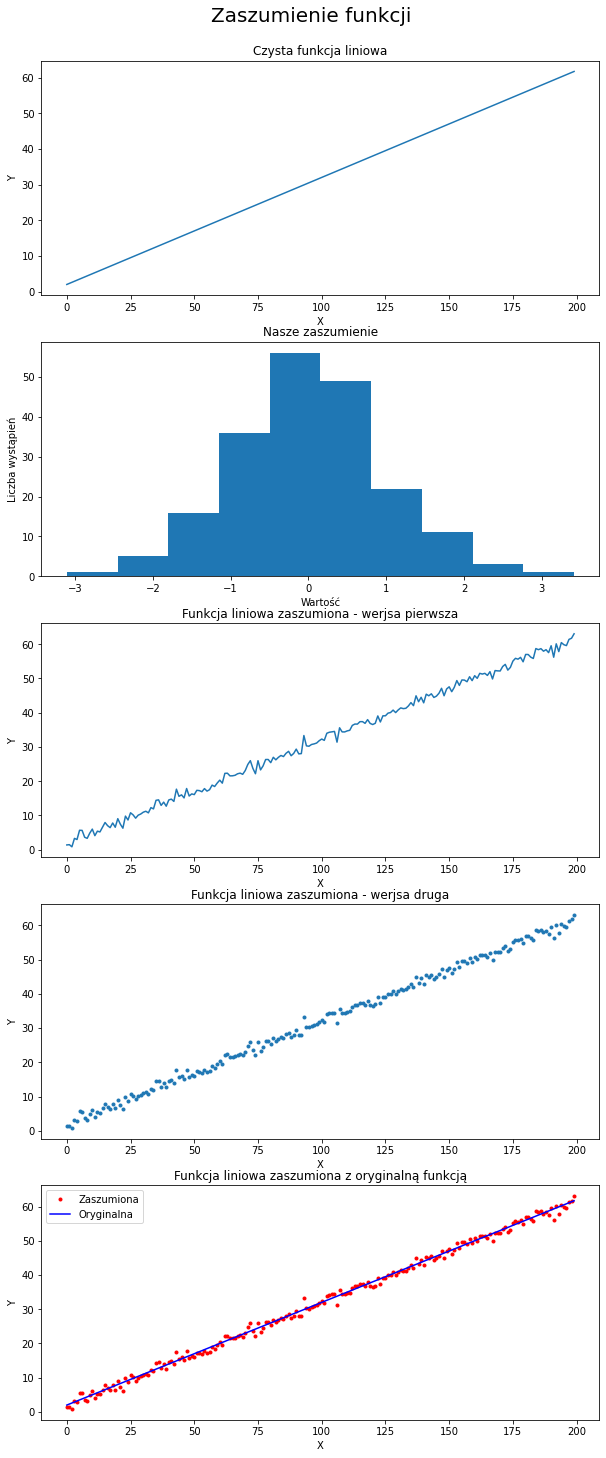

In [12]:
x = np.arange(200)
y = 2 + 0.3 * x
eps = np.random.randn(*x.shape)

plt.figure(figsize=(10, 25))

plt.suptitle("Zaszumienie funkcji", y=0.91, fontsize=20)

plt.subplot(5, 1, 1) # Inicjuję pierwszy wykres. Wartości w nawiasie to kolejno: (ile chcę wierszy, ile chcę kolumn, numer wykresu)
# Wszystkie rzeczy dotyczące tego konkretnego wykresu muszę wpisywać po inicjacji wykresu, ale przed inicjacją kolejnego.
plt.title("Czysta funkcja liniowa")
plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(5, 1, 2)
plt.title("Nasze zaszumienie")
plt.hist(eps, bins=10)
plt.xlabel("Wartość")
plt.ylabel("Liczba wystąpień")

plt.subplot(5, 1, 3)
plt.title("Funkcja liniowa zaszumiona - werjsa pierwsza")
plt.plot(x, y + eps)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(5, 1, 4)
plt.title("Funkcja liniowa zaszumiona - werjsa druga")
plt.plot(x, y + eps, '.') # Czasami warto się zastanowić czy chcemy plotować linię czy kropki - tutaj akurat linia wygląda mniej estetycznie i wiemy że przebieg funkcji do której dążymy nie będzie dokładnie tak wyglądać
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(5, 1, 5)
plt.title("Funkcja liniowa zaszumiona z oryginalną funkcją")
plt.plot(x, y + eps, 'r.', label="Zaszumiona") # r - red, kolor
plt.plot(x, y, 'b', label='Oryginalna')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

Druga wersja tego samego:

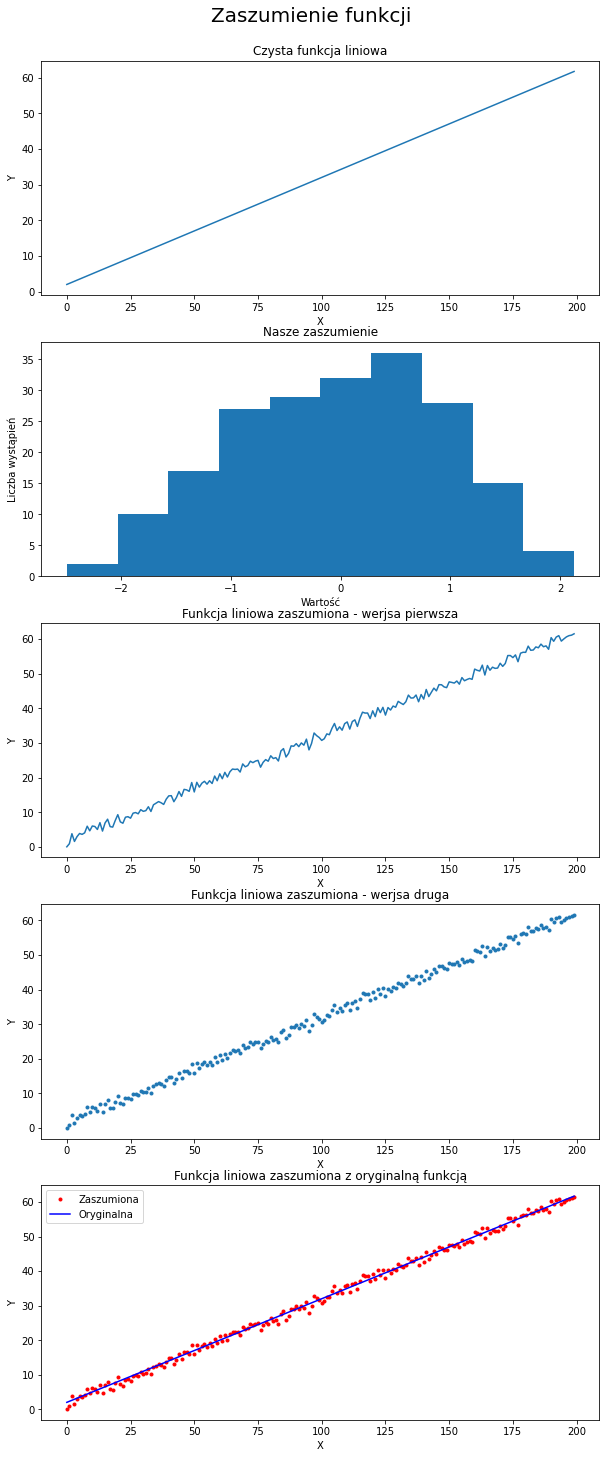

In [13]:
x = np.arange(200)
y = 2 + 0.3 * x
eps = np.random.randn(*x.shape)

fig, axes = plt.subplots(5, 1, figsize=(10, 25))

fig.suptitle("Zaszumienie funkcji", y=0.91, fontsize=20) # ale plt.suptitle też zadziała. 

# Ogólnie to fig jest od całego dużego obrazka a axes to lista odnośników go poszczególnych wykresów.

axes[0].set_title("Czysta funkcja liniowa")
axes[0].plot(x, y)
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

axes[1].set_title("Nasze zaszumienie")
axes[1].hist(eps, bins=10)
axes[1].set_xlabel("Wartość")
axes[1].set_ylabel("Liczba wystąpień")

axes[2].set_title("Funkcja liniowa zaszumiona - werjsa pierwsza")
axes[2].plot(x, y + eps)
axes[2].set_xlabel("X")
axes[2].set_ylabel("Y")

axes[3].set_title("Funkcja liniowa zaszumiona - werjsa druga")
axes[3].plot(x, y + eps, '.') # Czasami warto się zastanowić czy chcemy plotować linię czy kropki - tutaj akurat linia wygląda mniej estetycznie i wiemy że przebieg funkcji do której dążymy nie będzie dokładnie tak wyglądać
axes[3].set_xlabel("X")
axes[3].set_ylabel("Y")

axes[4].set_title("Funkcja liniowa zaszumiona z oryginalną funkcją")
axes[4].plot(x, y + eps, 'r.', label="Zaszumiona") # r - red, kolor
axes[4].plot(x, y, 'b', label='Oryginalna')
axes[4].set_xlabel("X")
axes[4].set_ylabel("Y")
axes[4].legend()

#Pandasy

In [14]:
df = pd.DataFrame({'a': np.arange(1, 100), 'b': 2 * np.arange(1, 100)})

In [15]:
df # Tutaj zwracam honor colabowi - jak klikniecie w tą chyba różdżkę to można przeglądać całą tabelkę :)

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
...,...,...
94,95,190
95,96,192
96,97,194
97,98,196


In [16]:
# Jest opcja ustawiająca próg liczby kolumn/wierszy dla którego będą wyświetlane one wszystkie:
pd.set_option('display.max_rows', 100)
df

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14
7,8,16
8,9,18
9,10,20


In [17]:
pd.set_option('display.max_rows', 30) # Ale dalej wystarczy nam mniejszy próg

In [18]:
print(df) # A to taka biedniejsza forma

     a    b
0    1    2
1    2    4
2    3    6
3    4    8
4    5   10
..  ..  ...
94  95  190
95  96  192
96  97  194
97  98  196
98  99  198

[99 rows x 2 columns]


In [19]:
# Warto zwrócić uwagę na indeksy wierszy (ta pierwsza kolumna bez tytułu). Zostają one zachowane nawet gdy wybierzemy ich podzbiór!
df_filtered = df[df.a % 20 == 0] # Wybieramy tylko wiersze gdzie kolumna a była podzielna przez 20
df_filtered

,a,b
19,20,40
39,40,80
59,60,120
79,80,160


In [20]:
# Wartości poszczególnych kolumn można uzyskać na dwa sposoby:
df1 = df_filtered['a']
df2 = df_filtered.b 
print(df1)
print(df2)
# Ale uwaga! są odwołania do kolumn z tabelki df_filtered!
df1 += 1
df2 += 2
df_filtered

19    20
39    40
59    60
79    80
Name: a, dtype: int32
19     40
39     80
59    120
79    160
Name: b, dtype: int32


,a,b
19,21,42
39,41,82
59,61,122
79,81,162


In [21]:
# Jak chcemy działać na kolumnie bez ingerowania w pierwotną tabelkę to warto zrobić kopię:
df3 = df_filtered.a.copy()
print(df3)
df3 += 3
df_filtered

19    21
39    41
59    61
79    81
Name: a, dtype: int32


,a,b
19,21,42
39,41,82
59,61,122
79,81,162


In [22]:
# A jak chcemy zresetować indeksy to wystarczy zrobić tak:
df4 = df_filtered.reset_index(drop=True)
df4

,a,b
0,21,42
1,41,82
2,61,122
3,81,162


In [23]:
# Teraz jeżeli chcielibyśmy dobrać się do jednego wybranego wiersza to należy pamiętać o tych właśnie indeksach:
print(df_filtered.a[19])
# Lub:
print(df_filtered.loc[19, 'a'])

21
21


In [24]:
# Jak chcemy dany wiersz dla wszystkich kolumn to można tak:
print(df_filtered.loc[19, :])

a    21
b    42
Name: 19, dtype: int32


In [25]:
# Jest też oczywiście opcja z numerem wiersza, a nie indeksem:
print(df_filtered.iloc[0, 0])
# Wtedy podajemy numer wiersza i kolumny

21
